In [1]:
!pip install mxnet

     |████████████████████████████████| 39.5 MB 86 kB/s s eta 0:00:01


In [2]:
!pip install d2l

     |████████████████████████████████| 112 kB 30.9 MB/s eta 0:00:01
     |████████████████████████████████| 17.0 MB 106.6 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 50.0 MB/s  eta 0:00:01
     |████████████████████████████████| 10.7 MB 77.7 MB/s eta 0:00:01
     |████████████████████████████████| 7.3 MB 57.0 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 39.3 MB/s  eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: idna
    Found existing installation: idna 3.3
    Uninstalling idna-3.3:
      Successfully uninstalled idna-3.3
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstalled requests-2.28.1
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.0
    Uninstalling pandas-1.5.0:
      Successfully unin

In [22]:
from mxnet import autograd, gluon, np, npx
from mxnet.gluon import nn
from d2l import mxnet as d2l

npx.set_np()

In [101]:
n_train = 200 
x_train = np.sort(np.random.rand(n_train) * 20) 

def f(x):
    return x**0.7 + x**(-1.2) + 0.3 * np.cos(x) + 0.1

y_train = f(x_train) + np.random.normal(0.0, 0.5, (n_train,))  # 训练样本的输出
x_test = np.arange(0, 50, 0.2) 
y_truth = f(x_test)  
n_test = len(x_test)  
n_test

250

In [180]:
import matplotlib as plt

def plot_kernel_reg(y_hat, y_avg):
    d2l.plot(x_test, [y_truth, y_hat, y_avg], r'$x$', r'$x^{0.7} + x^{-1.2} + 0.3 \cos(x) + 0.1$', legend = ['True', 'Pred - Kernel Regression', 'Pred - Linear Average'],
            xlim=[0, 20], ylim=[0, 11])
    d2l.plt.plot(x_train, y_train, 'o', color = 'red', alpha=0.5)
    d2l.plt.title('Nadaraya-Watson Regression')

In [181]:
import matplotlib
import matplotlib.font_manager
import matplotlib.pyplot as plt

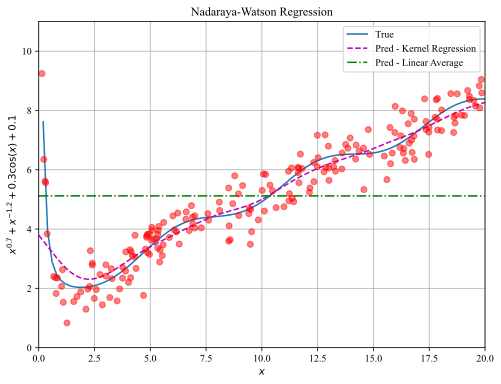

In [183]:
font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'style':'normal'}
matplotlib.rc('font', **font)

# matplotlib.rc('font', family='Baskerville')


y_avg = y_train.mean().repeat(n_test)


X_repeat = x_test.repeat(n_train).reshape((-1, n_train))


attention_weights = npx.softmax(-(X_repeat - x_train)**2 / 2)

y_hat = np.dot(attention_weights, y_train)


plt.figure(figsize=(8, 6))


plot_kernel_reg(y_hat, y_avg)